<a href="https://colab.research.google.com/github/waquasadnankarimi/Function/blob/main/Clustering13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

Answer:
- | Aspect             | K-Means Clustering                                                                | Hierarchical Clustering                                                           |
| ------------------ | --------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- |
| Basic idea         | Divides data into **K predefined clusters** by minimizing within-cluster variance | Builds a **tree-like structure (dendrogram)** showing how clusters merge or split |
| Number of clusters | **Must be specified in advance (K)**                                              | **Not required initially**; can be chosen later by cutting the dendrogram         |
| Approach           | Partition-based, iterative optimization                                           | Connectivity-based (agglomerative or divisive)                                    |
| Computational cost | Fast and scalable for large datasets                                              | Slower, expensive for large datasets                                              |
| Sensitivity        | Sensitive to initial centroids and outliers                                       | Less sensitive to initialization                                                  |
| Output             | Flat clusters                                                                     | Hierarchical relationship between clusters                                        |

**Use Cases:**

- K-Means: Customer Segmentation. A marketing team uses K-Means to partition millions of users into 5 distinct behavioral segments based on purchasing behavior for targeted campaigns.
- Hierarchical Clustering: Biological Taxonomy (Phylogeny). Researchers use Hierarchical clustering to determine relationships between species, creating a dendrogram to visualize how species merge into groups based on genetic similarity.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

Answer:
- The Silhouette Score measures the quality of clustering algorithms by evaluating how well each data point fits within its assigned cluster (cohesion) compared to other clusters (separation).

**Key Purposes of the Silhouette Score:**

-  Evaluating Cluster Quality: It determines how well-separated and distinct the resulting clusters are.
- Determining Optimal K: It helps identify the optimal number of clusters (\(k\)) by comparing scores across different configurations.
- Model Comparison: It allows for comparing the performance of different clustering algorithms (e.g., K-Means vs. Hierarchical).
- Identifying Outliers: Data points with values near -1 are likely assigned to the wrong cluster.

**Formula and Interpretation:**

- The score for a data point is calculated as \(S(i)=\frac{b(i)-a(i)}{\max (a(i),b(i))}\), where \(a(i)\) is the average intra-cluster distance and \(b(i)\) is the average distance to the nearest neighboring cluster.

- Near +1: Data point is far from neighboring clusters and close to its own cluster.
- Near 0: Data point is on the boundary between two clusters.
- Near -1: Data point is likely in the wrong cluster.

Question 3: What are the core parameters of DBSCAN, and how do they influence the clustering process?

Answer:
- DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups data points based on density, allowing it to find clusters of arbitrary shape and identify noise.

**Epsilon (e) Influence:**

- Too Small: Many points are incorrectly classified as noise, and clusters may be broken into tiny, fragmented groups.
- Too Large: Clusters merge together, losing granularity, and noisy points might be included within clusters.

**MinPts Influence:**
- Smaller Values: Generate more, smaller, and more sensitive clusters, which may include noise.
- Higher Values: Create fewer, more robust, and denser clusters, better for filtering noise in large datasets.

Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Answer:
- Feature scaling is essential for K-Means and DBSCAN because they are distance-based algorithms, such as Euclidean distance, which are sensitive to the magnitude of features. Without scaling, features with larger ranges (e.g., salary in thousands) dominate those with smaller ranges (e.g., age in tens), leading to biased, inaccurate clustering, and improved convergence speed.

- Preventing Feature Dominance: Algorithms calculate distances to group data points; large-scale features can overwhelm smaller ones.
- Equalizing Importance: Scaling ensures all features contribute equally to the distance calculation, preventing bias.
- K-Means Impact: Without scaling, centroids will be heavily skewed by features with high numerical ranges, causing poor cluster formation.
- DBSCAN Impact: DBSCAN uses a density threshold (eps) to define neighborhoods. - Features with high magnitudes will make eps irrelevant for smaller-scale features, ruining cluster identification.
- Improved Convergence: For algorithms that rely on iterative optimization (like K-Means), scaled data helps in achieving faster convergence.

Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

Answer:
- The Elbow Method is a graphical technique for finding the optimal number of clusters (k) in K-Means by plotting the Within-Cluster Sum of Squares (WCSS) against the number of clusters. It identifies the "elbow" point, where the rate of decrease in WCSS slows significantly, marking the optimal balance between cluster compactness and the number of clusters.

**Key Details on the Elbow Method:**

- Goal: To determine the best number of clusters (K) when it is not known beforehand.
- WCSS (Inertia): It calculates the sum of squared distances between each data point and its assigned cluster centroid. As \(k\) increases, WCSS decreases because points are closer to their centroids.
- The "Elbow" Point: The plot of WCSS vs. \(k\) often looks like an arm. The point where the slope changes drastically (the "bend" or "elbow") indicates that adding more clusters provides diminishing returns in explaining the data structure.

- Methodology:
  - Run the K-Means algorithm for a range of (k) values (e.g., (k=1) to (10).
  - Calculate the WCSS for each (k).
  - Plot the WCSS values against (k).
  - Locate the elbow point where the curve flattens.







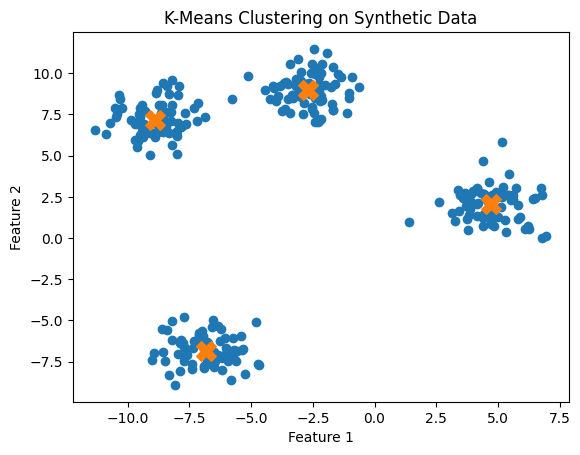

In [1]:
'''
Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.
'''
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.figure()
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200)
plt.title("K-Means Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



In [2]:
'''
Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).
'''
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

data = load_wine()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print("Number of clusters found (excluding noise):", n_clusters)



Number of clusters found (excluding noise): 0


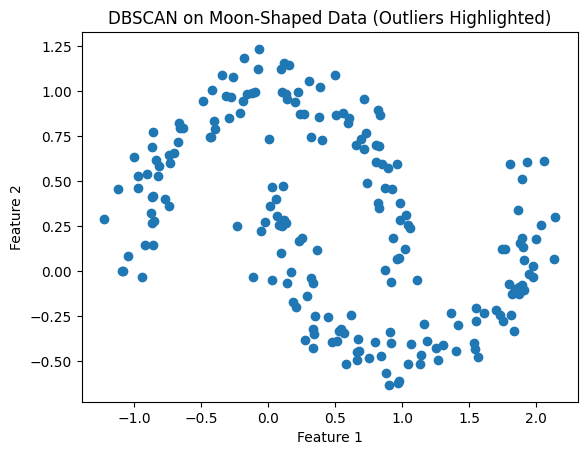

In [3]:
'''
Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.
'''
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np

X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

outliers = labels == -1
clusters = labels != -1

plt.figure()
plt.scatter(X[clusters, 0], X[clusters, 1], marker='o')
plt.scatter(X[outliers, 0], X[outliers, 1], marker='x')
plt.title("DBSCAN on Moon-Shaped Data (Outliers Highlighted)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


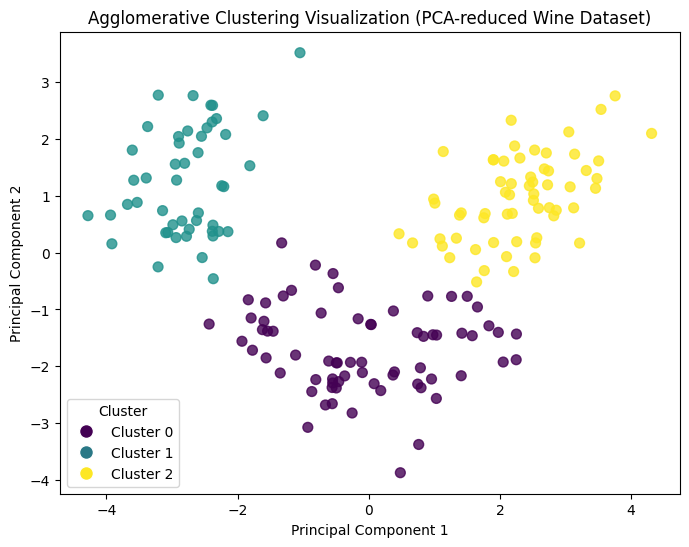

In [4]:
'''
Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter p
'''
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

wine = datasets.load_wine()
X = wine.data
y = wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

agg_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster_labels = agg_cluster.fit_predict(X_pca)

plt.figure(figsize=(8, 6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.8)

plt.title('Agglomerative Clustering Visualization (PCA-reduced Wine Dataset)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {i}',
             markerfacecolor=c, markersize=10) for i, c in enumerate(['#440154', '#2a7886', '#fde725'])],
           title='Cluster')
plt.show()


In [5]:
'''
Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?
'''
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

data = {
    'CustomerID': range(1, 101),
    'Age': np.random.randint(18, 65, 100),
    'TotalSpend': np.random.uniform(100, 5000, 100),
    'Frequency': np.random.randint(1, 50, 100),
    'Category_Electronics': np.random.randint(0, 10, 100),
    'Category_Fashion': np.random.randint(0, 10, 100)
}
df = pd.DataFrame(data)


X = df[['Age', 'TotalSpend', 'Frequency', 'Category_Electronics', 'Category_Fashion']]
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Output Cluster Centers (Average behavior per segment)
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)


         CustomerID        Age   TotalSpend  Frequency  Category_Electronics  \
Cluster                                                                        
0         41.909091  55.045455  2231.720127  39.000000              6.272727   
1         60.181818  37.545455  2885.412626  27.863636              2.681818   
2         48.062500  35.656250  3738.463396  18.843750              4.406250   
3         52.750000  37.416667  1113.768408  11.083333              5.333333   

         Category_Fashion  
Cluster                    
0                4.772727  
1                6.954545  
2                1.343750  
3                4.125000  
